# Env  

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Data Load

In [54]:
diabetes=load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

# nd array임
print(df_X)
print(df_y)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 

In [55]:
print(type(df_x))

<class 'numpy.ndarray'>


In [56]:
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


# train test 분리

In [57]:
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = 0.1, random_state =42)

In [58]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (397, 10)
X_test shape: (45, 10)
y_train shape: (397,)
y_test shape: (45,)


# 모델 준비하기

In [59]:
for i, feature_name in enumerate(diabetes.feature_names):
    print(f'feature {i+1} : {feature_name}')

# w 10개 b 1개 준비해야함

feature 1 : age
feature 2 : sex
feature 3 : bmi
feature 4 : bp
feature 5 : s1
feature 6 : s2
feature 7 : s3
feature 8 : s4
feature 9 : s5
feature 10 : s6


In [60]:
W = np.random.rand(10)
b = np.random.rand()

In [61]:
W

array([0.02248162, 0.22489874, 0.97137587, 0.49940595, 0.04683103,
       0.48947958, 0.21087718, 0.54203093, 0.0834224 , 0.88099794])

In [62]:
b

0.8471077838513612

In [63]:
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    
    return predictions

# 손실함수 정의하기

In [64]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    
    return mse

In [65]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    
    return L

# Gradient 구현하기

In [66]:
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dw = 1/N * 2 * X.T.dot(y_pred - y)
    
    db = 2 * (y_pred - y).mean()
    
    return dw, db

# 학습률 설정하기

In [79]:
lr = 0.1

# 모델 학습하기

In [80]:
losses = []

for i in range(1, 5000):
    dw, db = gradient(X_train, W, b, y_train)
    W -= lr * dw
    b -= lr * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    
    if i % 100 == 0:
        print('Iteration %d : LOSS %0.4f' % (i, L))

Iteration 100 : LOSS 4914.1195
Iteration 200 : LOSS 4522.9343
Iteration 300 : LOSS 4231.8148
Iteration 400 : LOSS 4011.8433
Iteration 500 : LOSS 3842.8268
Iteration 600 : LOSS 3710.6272
Iteration 700 : LOSS 3605.3126
Iteration 800 : LOSS 3519.8756
Iteration 900 : LOSS 3449.3462
Iteration 1000 : LOSS 3390.1755
Iteration 1100 : LOSS 3339.8091
Iteration 1200 : LOSS 3296.3903
Iteration 1300 : LOSS 3258.5536
Iteration 1400 : LOSS 3225.2814
Iteration 1500 : LOSS 3195.8040
Iteration 1600 : LOSS 3169.5294
Iteration 1700 : LOSS 3145.9942
Iteration 1800 : LOSS 3124.8294
Iteration 1900 : LOSS 3105.7359
Iteration 2000 : LOSS 3088.4669
Iteration 2100 : LOSS 3072.8158
Iteration 2200 : LOSS 3058.6073
Iteration 2300 : LOSS 3045.6905
Iteration 2400 : LOSS 3033.9344
Iteration 2500 : LOSS 3023.2244
Iteration 2600 : LOSS 3013.4591
Iteration 2700 : LOSS 3004.5487
Iteration 2800 : LOSS 2996.4129
Iteration 2900 : LOSS 2988.9800
Iteration 3000 : LOSS 2982.1854
Iteration 3100 : LOSS 2975.9711
Iteration 3200 : 

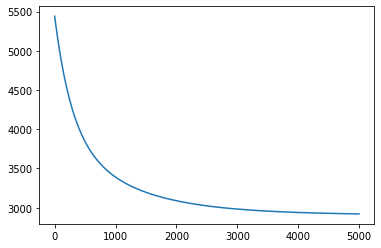

In [81]:
plt.plot(losses)

In [82]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2750.560330749415

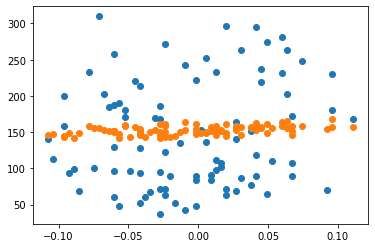

In [52]:
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)